<a href="https://colab.research.google.com/github/KodumuruRaja/Dimensionality-Reduction-Algorithms/blob/main/Principal-Component-Regressor-(PCR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"
data_full = pd.read_csv(url)

In [ ]:
data = data_full[["mpg", "disp", "drat", "wt", "qsec", "hp"]]

In [ ]:
data[0:6]

,mpg,disp,drat,wt,qsec,hp
0,21.0,160.0,3.90,2.620,16.46,110
1,21.0,160.0,3.90,2.875,17.02,110
2,22.8,108.0,3.85,2.320,18.61,93
3,21.4,258.0,3.08,3.215,19.44,110
4,18.7,360.0,3.15,3.440,17.02,175
5,18.1,225.0,2.76,3.460,20.22,105


In [ ]:
X = data[["mpg", "disp", "drat", "wt", "qsec"]]
y = data[["hp"]]

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
#define cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse = []

In [ ]:
# Calculate MSE with only the intercept
from sklearn.model_selection import cross_val_score
score = -1*cross_val_score(regr, np.ones((len(X_reduced),1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [ ]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'hp')

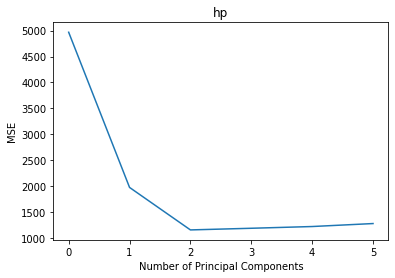

In [ ]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [ ]:
#calculate percentage of variation explained
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([69.83, 89.35, 95.88, 98.95, 99.99])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [ ]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

40.20964210761152